# Rozpoznawanie jednostek nazewniczych

### Główne kategorie z NKJP

- persName
- orgName
- geogName
- placeName
- date
- time

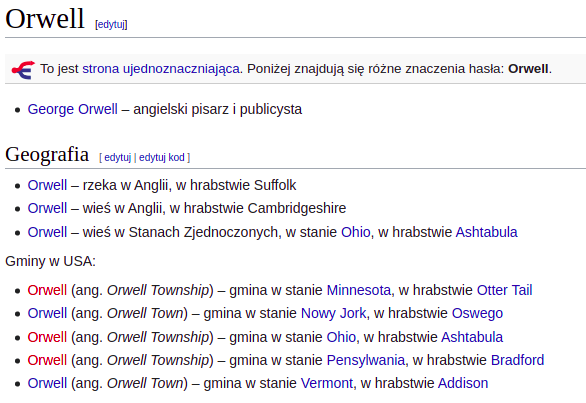

### Klasyfikacja

- Naive Bayes
- CRF
- LSTM

```
wget https://klejbenchmark.com/static/data/klej_psc.zip
unzip klej_psc.zip -d klej_psc
```

In [1]:
import pandas as pd
import spacy

nlp = spacy.load("pl_core_news_md")

In [2]:
df = pd.read_csv("klej_psc/train.tsv", sep="\t", nrows=6)
df

,extract_text,summary_text,label
0,Prywatna spółka KrzysztofaToeplitza od siedmiu...,W piątek w wielu uczelniach odbyły się uroczys...,0
1,"Jeżeli HP nie przyjmie propozycji ARiMR, zakoń...",Doszło do konfliktu pomiędzy Agencją Restruktu...,1
2,W latach 90. wielkość rosyjskiego Produktu Kra...,"Trybunał Konstytucyjny orzekł, że posłom i sen...",0
3,"Mit o potopie jest prastary, sięga czasów, gdy...",Dwójka amerykańskich geofizyków przedstawiła s...,1
4,Po zakończeniu obrad każdy poseł ma prawo wygł...,74 posłów AWS-u podpisało wniosek o wotum nieu...,0
5,"Zębami, pazurami i dolarami bronią się związki...",Od kilkunastu lat poziom nauczania w amerykańs...,1


In [3]:
corpus = list(nlp.pipe(df["extract_text"]))

In [4]:
doc = corpus[0]

In [5]:
doc

Prywatna spółka KrzysztofaToeplitza od siedmiu lat wynajmuje atrakcyjną kamienicę na Starym Mieście. wątpliwości budzi umowa najmu. traci na niej skarb państwa.  1994 roku dyrektor ODZ, podpisał umowę najmu kamienicy z Towarzystwem Wydawniczym i Literackim.  Pierwotna umowa została zmieniona. powiększano wynajmowaną powierzchnię. Wydłużono też okres wynajmu. W umowie nie uwzględniono jednak możliwości podniesienia czynszu.

In [6]:
for ent in doc.ents:
    print(ent)

KrzysztofaToeplitza
Starym Mieście
1994 roku
ODZ
Towarzystwem Wydawniczym i Literackim


In [7]:
for ent in doc.ents:
    print(f"{ent.text:<38} : {ent.label_}")

KrzysztofaToeplitza                    : orgName
Starym Mieście                         : geogName
1994 roku                              : date
ODZ                                    : orgName
Towarzystwem Wydawniczym i Literackim  : orgName


In [8]:
from spacy import displacy

In [9]:
displacy.render(doc, style='ent', jupyter=True)

In [10]:
displacy.render(corpus[1], style='ent', jupyter=True)

In [11]:
displacy.render(corpus[2], style='ent', jupyter=True)

In [12]:
displacy.render(corpus[3], style='ent', jupyter=True)

In [13]:
displacy.render(corpus[4], style='ent', jupyter=True)

In [14]:
displacy.render(corpus[5], style='ent', jupyter=True)